In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB



 - id 칼럼은 각 행의 고유한 id를 나타냅니다. 총 6,255 개의 훈련용 데이터가 있네요.
 - Store는 쇼핑몰 지점 정보입니다. 1에서 45 까지의 지점이 있는듯 합니다.
 - Date는 주 단위(Weekly) 날짜입니다.2010년 2월 5일부터 2012년 9월 28일까지 있는 것 같네요.
 - Temperature는 쇼핑몰 주변 기온입니다. 아무래도 화씨(F)로 표현된 것 같습니다.
 - Fuel_Price는 쇼핑몰 주변 연료 가격입니다. 2년 사이에 1.6배나 올랐네요.
 - Promotion은 쇼핑몰의 비식별화된 프로모션 정보입니다. 잘 모르겠지만 nan 값들이 많이 보이네요.
 - Unemployment는 실업률 정보입니다. 아무래도 실업률이 높아지면 소비가 위축되지 않을까 싶네요.
 - IsHoliday는 공휴일 정보입니다. 휴일이면 쇼핑하러 갈 시간이 더 많아지지 않을까요?
 - Weekly_Sales는 주간 매출액으로 이번 대회의 목표 예측값입니다. 지점별로 차이가 큰 모습을 보이네요.


In [5]:
train.Date = pd.to_datetime(train.Date, dayfirst=True)

In [6]:
def F2C(Fahrenheit):
    Celsius = (Fahrenheit - 32) * 5/9
    return Celsius
train.Temperature = train.Temperature.apply(F2C)

In [7]:
train.tail()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
6250,6251,45,2012-08-31,23.938889,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,2012-09-07,24.277778,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,2012-09-14,19.927778,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,2012-09-21,18.511111,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20
6254,6255,45,2012-09-28,18.266667,3.997,4556.61,20.64,1.50,1601.01,3288.25,8.684,False,713173.95


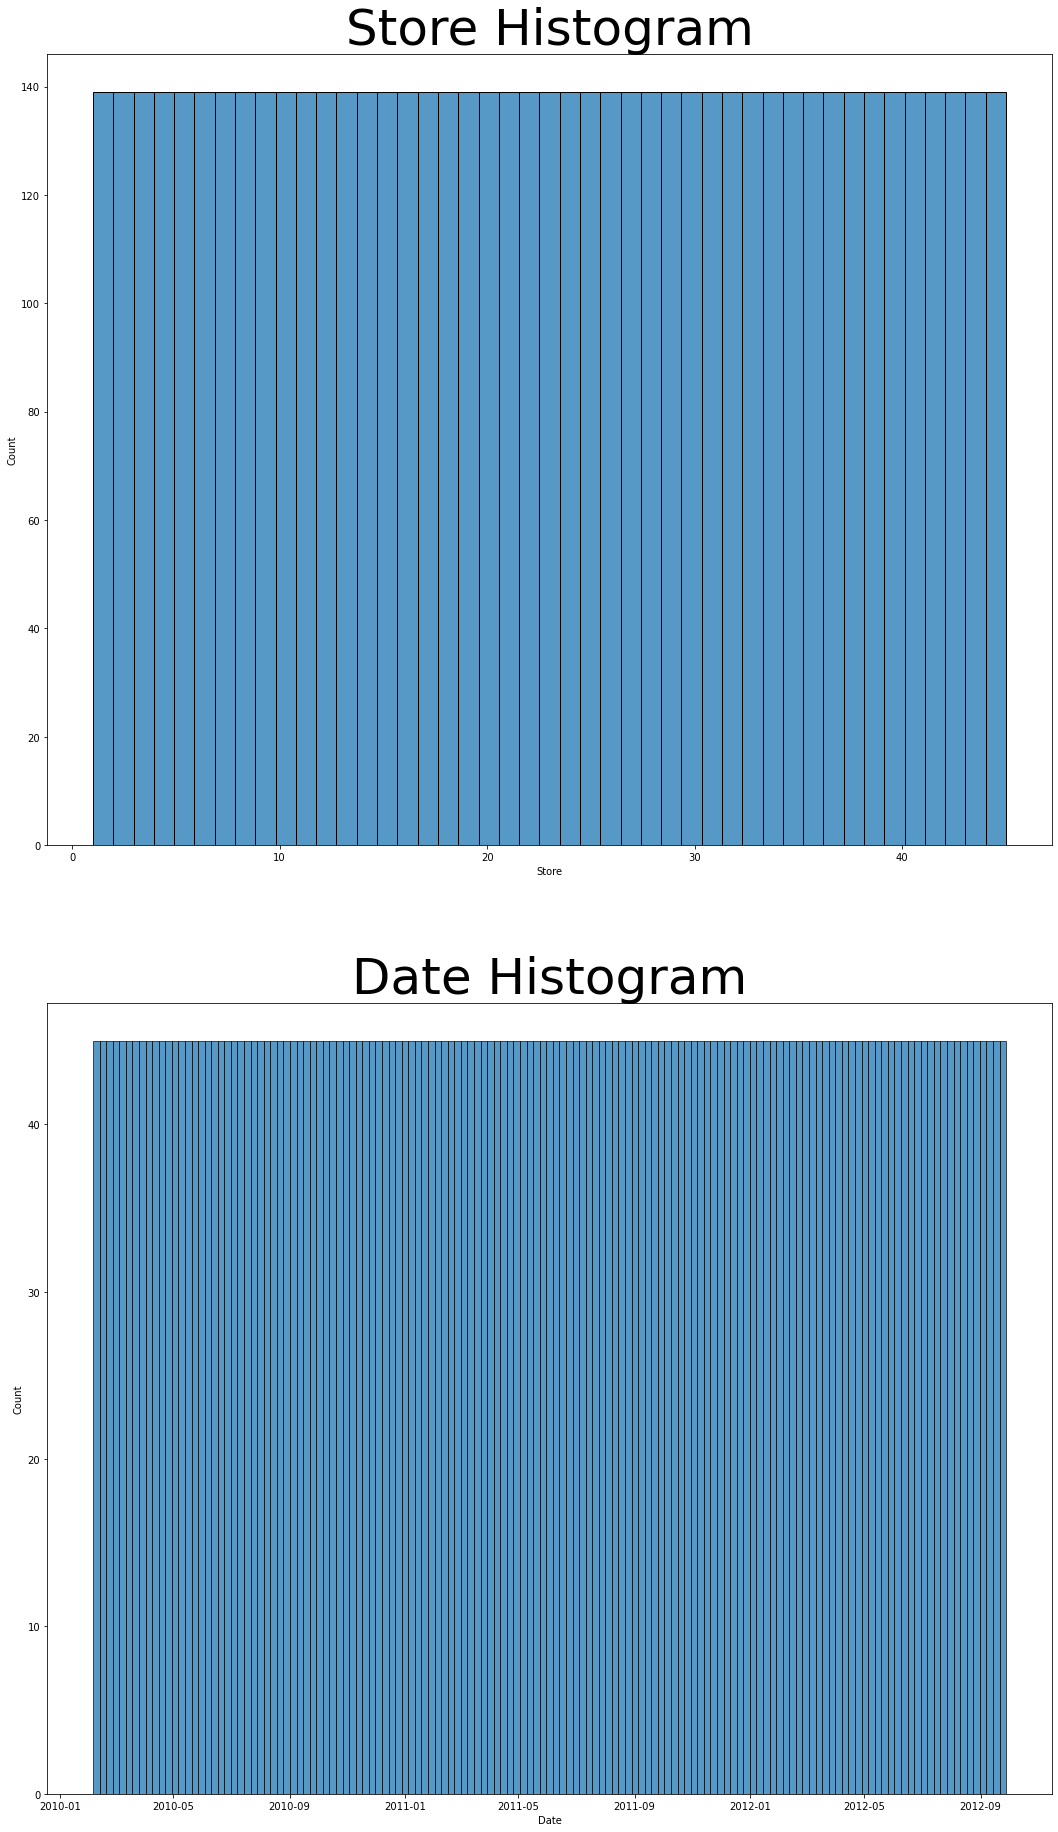

Store 종류의 개수는 45 개 입니다.


In [8]:
## Store

f, ax = plt.subplots(2, 1, figsize=(18, 32))

sns.histplot(train['Store'], bins=45, ax=ax[0])
ax[0].set_title('Store Histogram', size=50)


sns.histplot(train['Date'], bins=139, ax=ax[1])
ax[1].set_title('Date Histogram', size=50)

plt.show()



In [12]:
# 명확한 숫자를 확인하기 위해 수치를 출력합니다.
print("Store 종류의 개수는", len(train.Store.unique()), "개 입니다")
print("Store 개수의 최댓값은", train.Store.value_counts().max(), "입니다")
print("Store 개수의 최솟값은", train.Store.value_counts().min(), "입니다")

Store 종류의 개수는 45 개 입니다
Store 개수의 최댓값은 139 입니다
Store 개수의 최솟값은 139 입니다


 - 히스토그램과 value_counts() 결과를 볼 때 Store는 1에서 45까지 존재(매장이 총 45개)
 - 각각 139개의 rows를 가지는 data라는 점을 알 수 있습니다. (균일한 분포)
 - 결측치 없음.


In [19]:
print(f"Date 종류의 개수는", len(train['Date'].unique()), '개 입니다.')
print(f"Date의 최대값은", train['Date'].min(), '입니다.')
print(f"Date의 최대값은", train['Date'].max(), '입니다.')
print(f"Date의 개수의 최대값은", train['Date'].value_counts().max(), '입니다.')
print(f"Date의 개수의 최대값은", train['Date'].value_counts().min(), '입니다.')

Date 종류의 개수는 139 개 입니다.
Date의 최대값은 2010-02-05 00:00:00 입니다.
Date의 최대값은 2012-09-28 00:00:00 입니다.
Date의 개수의 최대값은 45 입니다.
Date의 개수의 최대값은 45 입니다.


 - Date는 2010-02-05부터 2012-09-28까지 총 139개 주(week)값을 45가지의 store별로 가지고 있다고 유추가능 (45 x 139 = 6255)
 - 이렇게 동일한 기간 동안 수집된 형태의 데이터는 동일한 날짜에서 각 지점이 어떤 차이를 갖는지 확인하면 차이를 발견하기 쉽습니다.

In [23]:
train[train['Date'] == '2010-02-05']

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,2010-02-05,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
139,140,2,2010-02-05,4.550000,2.572,NaN,NaN,NaN,NaN,NaN,8.324,False,2136989.46
278,279,3,2010-02-05,7.616667,2.572,NaN,NaN,NaN,NaN,NaN,7.368,False,461622.22
417,418,4,2010-02-05,6.533333,2.598,NaN,NaN,NaN,NaN,NaN,8.623,False,2135143.87
556,557,5,2010-02-05,4.277778,2.572,NaN,NaN,NaN,NaN,NaN,6.566,False,317173.10
695,696,6,2010-02-05,4.683333,2.572,NaN,NaN,NaN,NaN,NaN,7.259,False,1652635.10
834,835,7,2010-02-05,-11.927778,2.580,NaN,NaN,NaN,NaN,NaN,9.014,False,496725.44
973,974,8,2010-02-05,1.188889,2.572,NaN,NaN,NaN,NaN,NaN,6.299,False,1004137.09
1112,1113,9,2010-02-05,3.338889,2.572,NaN,NaN,NaN,NaN,NaN,6.415,False,549505.55
1251,1252,10,2010-02-05,12.411111,2.962,NaN,NaN,NaN,NaN,NaN,9.765,False,2193048.75


----

각 column을 하나씩 살펴봅시다.

    - Temperature 기온 : 각 지점에 따라 측정된 기온이 모두 다르다는 것을 알 수 있습니다. 또한 각 지점별 차이가 큰 모습을 보입니다. Store 26은 영하 12도 이지만 Store 33은 영상 13도네요.
    - Fuel_Price 연료비 : 연료비는 지역별, 공급체별로 동일한 양상을 보입니다. 이 데이터를 보면 미미한 차이를 보이며 다른 값들이 보이네요.
    - Promotion1~5 : 모든 지점에서 Promotion 정보가 누락되었습니다. 전 지점에서 Promotion을 하지 않았다기 보다는 2010년 2월 시점에서는 Promotion 정보를 수집하지 않았다고 보는 편이 합리적일 것 같습니다.
    - Unemployment 실업률 : 실업률을 계산하는 정확한 식은 알 수 없지만, 일반적으로 지역을 기반으로 실업률을 계산합니다. 이 데이터를 보면 미미한 차이를 보이며 다른 값들이 보이네요.
    - IsHoliday 휴일 포함 여부 : 공휴일과 같은 휴일 포함 여부입니다. 2010년 2월 5일, 즉 2월 첫째주에서는 모두 False 네요. 그러나 모든 날짜에 대해서도 모든 Store가 동일한 IsHoliday 값을 갖는지는 확인이 필요합니다.
    - Weekly_Sales 매출액 : 각 지점별 매출액이 크게 차이가 있음을 알 수 있습니다. Store 지점이라는 정보가 매출액을 예측하는 데에 중요한 역할을 할 것 같네요.


---

### 분석 계획
    1. 지점별 IsHoliday 값들을 확인할 필요가 있습니다. 만약 동일한 날짜에 다른 IsHoliday 값을 갖는다면, 이는 각 지점이 서로 다른 나라(행정 구역)에 속한다는 뜻이기 때문입니다.
    2. Promotion은 매출액에 큰 영향을 미치는 요인 중 하나입니다. 이번 데이터에서 Promotion이 언제부터 집계되었는지 확인한 뒤 특별한 패턴이 있는지 확인해볼 수 있습니다.

---

## 결측치 (NA) 처리

결측치란 관측되지 않아 아무것도 없는 공간(Not Available)으로 되어있는 데이터입니다.

이 부분을 무엇인가로 채워주어야 분석을 진행할 수 있습니다.

이번 대회의 데이터는 Promotion1~Promotion5 의 5개 칼럼만 NA값을 갖고 있습니다.

먼저 Promotion 칼럼에 언제부터 NA가 아닌 값이 등장했는지 확인해보겠습니다.

In [25]:
# 일단 Promotion1에서 언제부터 NA가 아닌 값이 등장했는지 확인해봅시다.
# NA가 아닌 값이 처음 등장한 날짜를 반환하는 함수를 작성합니다.

def get_first_promotion(dataframe):
    temp_df = dataframe[dataframe.Promotion1.isna() == False]
    first_date = temp_df['Date'].iloc[0]
    return first_date

train.groupby('Store').apply(get_first_promotion)

Store
1    2011-11-11
2    2011-11-11
3    2011-11-11
4    2011-11-11
5    2011-11-11
6    2011-11-11
7    2011-11-11
8    2011-11-11
9    2011-11-11
10   2011-11-11
11   2011-11-11
12   2011-11-11
13   2011-11-11
14   2011-11-11
15   2011-11-11
16   2011-11-11
17   2011-11-11
18   2011-11-11
19   2011-11-11
20   2011-11-11
21   2011-11-11
22   2011-11-11
23   2011-11-11
24   2011-11-11
25   2011-11-11
26   2011-11-11
27   2011-11-11
28   2011-11-11
29   2011-11-11
30   2011-11-11
31   2011-11-11
32   2011-11-11
33   2011-11-11
34   2011-11-11
35   2011-11-11
36   2011-11-11
37   2011-11-11
38   2011-11-11
39   2011-11-11
40   2011-11-11
41   2011-11-11
42   2011-11-11
43   2011-11-11
44   2011-11-11
45   2011-11-11
dtype: datetime64[ns]

모든 Store에 대해 Promotion1 칼럼에서
처음으로 NA가 아닌 값이 등장한 날짜가 2011년 11월 11일이네요.

이는 2011년 11월 11일부터 Promotion 정보를 수집하기 시작했기 때문인 것으로 이해할 수 있겠습니다.

이런 경우 수집 이전의 데이터를 단순하게 0으로 채워넣는 것보다는
수집 이후 데이터를 적절하게 활용하여 값을 채워넣는 것이 더 좋을 수 있습니다.

하지만 이번 베이스라인에서는 NA 값을 프로모션이 진행되지 않은 경우로 가정하여
NA 값을 0 으로 치환하여 분석을 진행하도록 하겠습니다.


In [26]:
# 결측치를 모두 0으로 채워줍니다.

train = train.fillna(0)

train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,2010-02-05,5.727778,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90
1,2,1,2010-02-12,3.616667,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44
2,3,1,2010-02-19,4.405556,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17
3,4,1,2010-02-26,8.127778,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59
4,5,1,2010-03-05,8.055556,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,23.938889,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,2012-09-07,24.277778,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,2012-09-14,19.927778,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,2012-09-21,18.511111,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            6255 non-null   int64         
 1   Store         6255 non-null   int64         
 2   Date          6255 non-null   datetime64[ns]
 3   Temperature   6255 non-null   float64       
 4   Fuel_Price    6255 non-null   float64       
 5   Promotion1    6255 non-null   float64       
 6   Promotion2    6255 non-null   float64       
 7   Promotion3    6255 non-null   float64       
 8   Promotion4    6255 non-null   float64       
 9   Promotion5    6255 non-null   float64       
 10  Unemployment  6255 non-null   float64       
 11  IsHoliday     6255 non-null   bool          
 12  Weekly_Sales  6255 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2)
memory usage: 592.6 KB


---

## 데이터 시각화

그래프를 이용하면 복잡한 데이터를 이해하기 쉽게 표현할 수 있습니다.

데이터를 이해하면 분석 방향성을 설정하기 쉬워지고, 인사이트를 발굴하기도 쉬워집니다.

시각화를 위해 matplotlib과 seaborn 라이브러리를 사용하여 그래프를 그려봅시다.

분석의 편의를 위해 수치형 feature와 카테고리형 feature를 분리해주겠습니다.


In [34]:
train.dtypes

id                       int64
Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
Promotion1             float64
Promotion2             float64
Promotion3             float64
Promotion4             float64
Promotion5             float64
Unemployment           float64
IsHoliday                 bool
Weekly_Sales           float64
dtype: object

In [41]:
numeric_feature = train.columns[(train.dtypes==int) | (train.dtypes==float)]
categorical_feature = train.columns[(train.dtypes=='O') | (train.dtypes==bool)]

print(f"수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print(f"카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['id', 'Store', 'Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment', 'Weekly_Sales']
카테고리형 데이터는 다음과 같습니다. 
 ['IsHoliday']


### 수치형 데이터 시각화
Box plot을 이용해서 수치형 데이터를 시각화합니다.

Index(['Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2', 'Promotion3',
       'Promotion4', 'Promotion5', 'Unemployment', 'Weekly_Sales'],
      dtype='object')

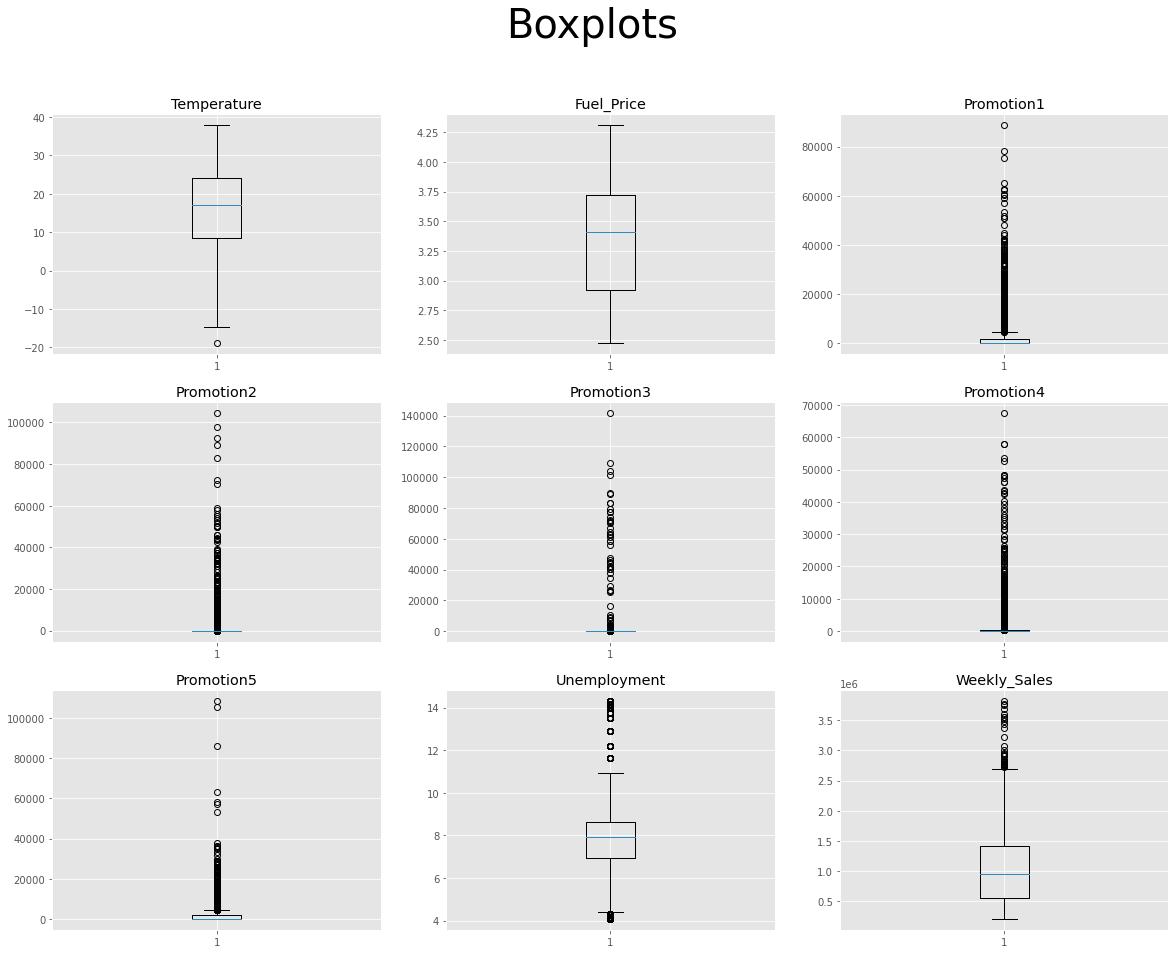

In [50]:
plt.style.use('ggplot')

feature = numeric_feature.drop(['id', 'Store'])

# Boxplot을 사용해서 데이터의 분포를 살펴보자.
plt.figure(figsize=(20, 15))
plt.suptitle('Boxplots', fontsize=40)

for i in range(len(feature)):
    plt.subplot(3, 3, i+1)
    plt.title(feature[i])
    plt.boxplot(train[feature[i]])
    

plt.show()

Promotion column에서 이상치가 많이 관측된다.

대부분의 값들이 0에 몰려있기 때문을 보인다.

Promotion의 경우 값이 관측되기 시작한 2011-11-11이후 데이터만 따로 시각화해보도록 한다.

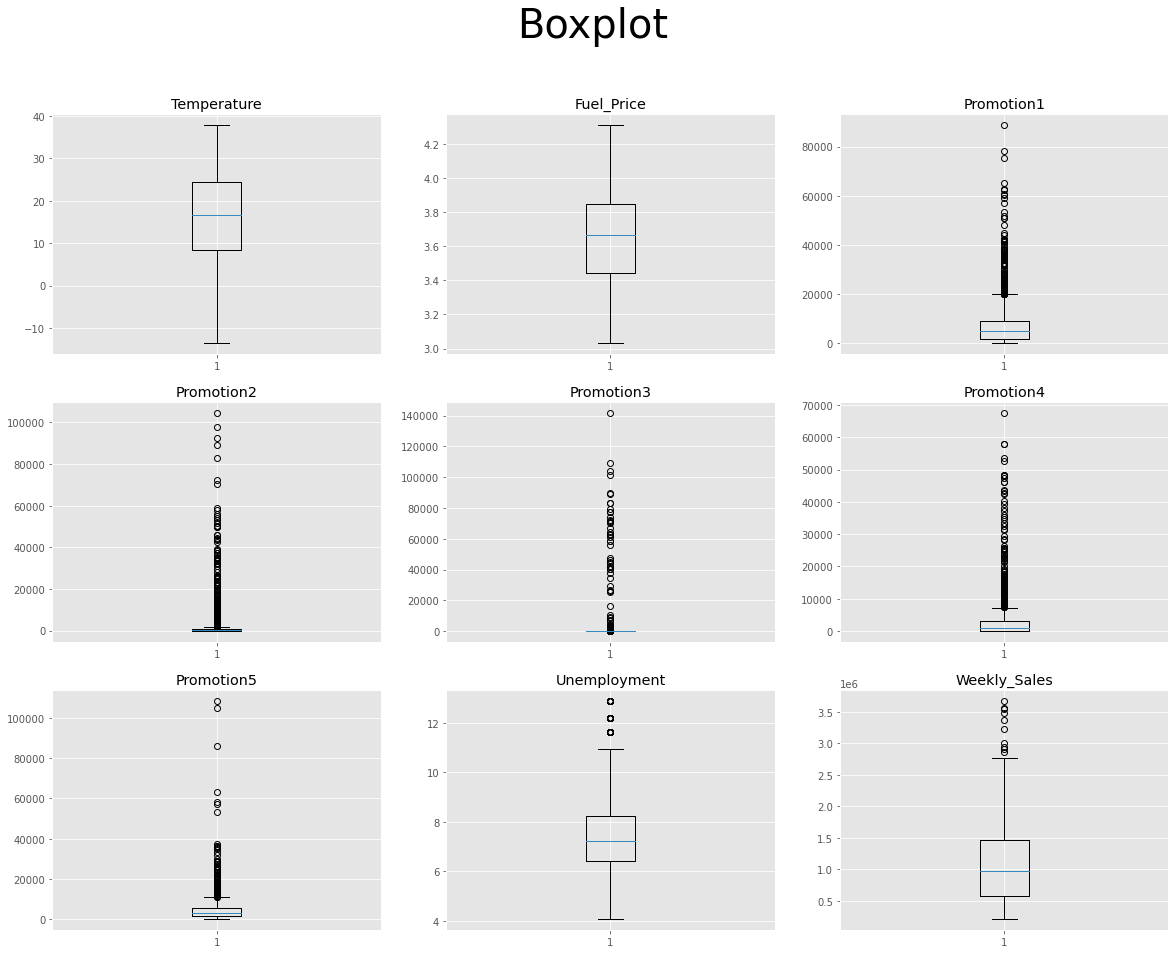

In [52]:
temp_df = train[train['Date'] > '2011-11-11']

# Boxplot을 사용해서 데이터의 분포를 살펴보자. (2011-11-11이후)
plt.figure(figsize=(20, 15))
plt.suptitle('Boxplot', fontsize=40)

for i in range(len(feature)):
    plt.subplot(3,3,i+1)
    plt.title(feature[i])
    plt.boxplot(temp_df[feature[i]])
plt.show()

2011년 11월 11일 이후 데이터에서도 정상적인 분포를 이루지 않음을 확인할 수 있습니다.

Promotion 칼럼들에 대해서 조금 더 자세한 분석이 필요하겠네요.


---

## 카테고리형 데이터 시각화

Bar plot을 이용해 카테고리형 데이터를 시각화 합니다.

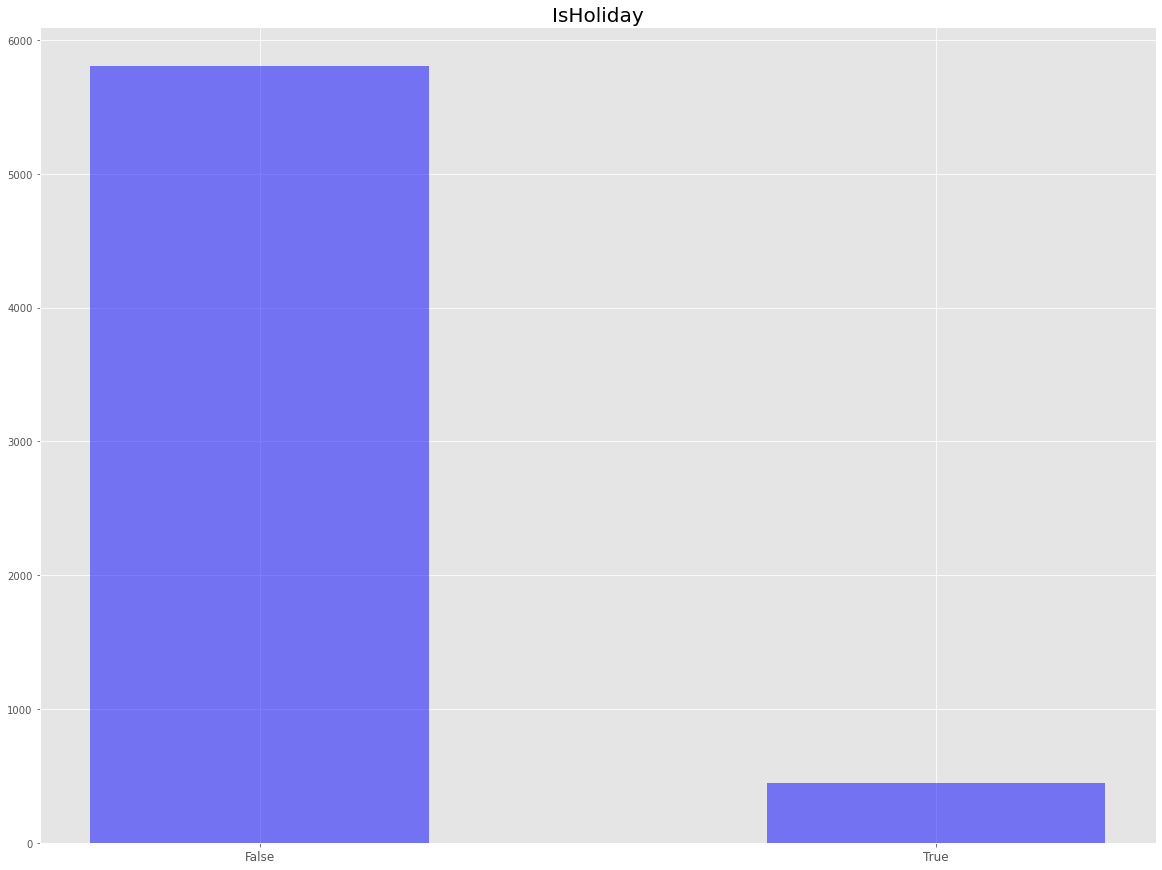

In [55]:
feature = categorical_feature

plt.figure(figsize=(20, 15))
for i in range(len(feature)):
    
    plt.title(feature[i], fontsize=20)
    temp = train[feature[i]].value_counts()
    plt.bar(['False', 'True'], temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
    plt.show()

예상대로 매우 적은 True 값만을 가지고 있습니다.

날짜, Promotion 등의 정보와 같이 분석이 이루어져야 한다.


---
## 상관관계 시각화

feature들 간의 상관관계를 살펴보는 것은 분석에 많은 도움이 됩니다.

먼저 전체 feature들 간의 상관관계를 살펴본 뒤

주요 feature와 타겟 feature의 상관관계를 산점도를 통해 살펴보겠습니다.

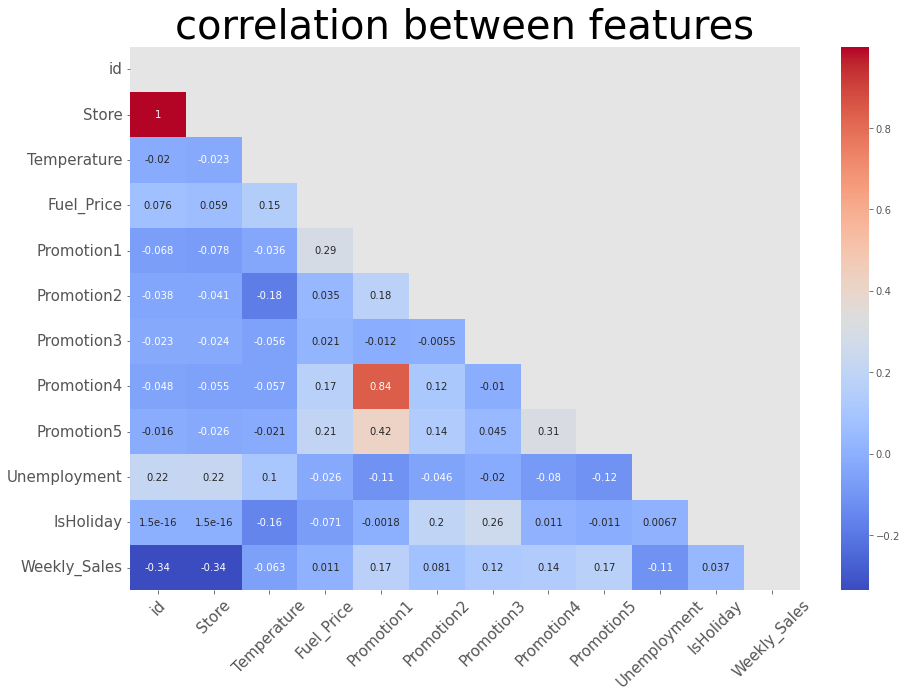

In [59]:
#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = train.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

예측하고자 하는 값인 Weekly_Sales 와 가장 강한 상관관계를 보이는 것은 Store 입니다.

예상과는 다르게 Promotion은 큰 상관관계를 보이지 않습니다.

그러나 이는 Store 모두를 통합해서 보았기 때문일 가능성이 있습니다.
서로 다른 특성을 가진 지점들을 하나로 묶어 보았기 때문입니다.

이번엔 하나의 Store 만을 살펴보겠습니다.


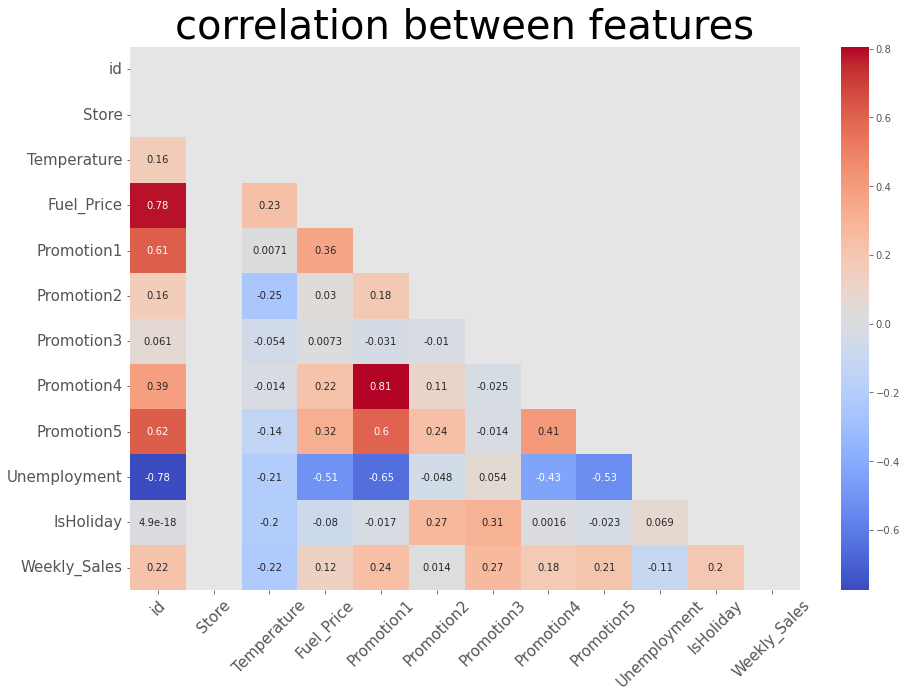

In [60]:
#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = train[train['Store']==1].corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

Store 가 1 인 지점만을 살펴본 결과,
위와는 전혀 다른 상관관계표가 나왔습니다.

이를 추가적으로 더 분석해볼 수도 있겠네요.

---

## Target 과 다른 feature들 과의 관계

상관 분석을 통해 얻은 결과를 좀 더 자세하게 살펴보겠습니다.

수치형 feature를 시각화하기 위해 scatter plot을 이용해보겠습니다.

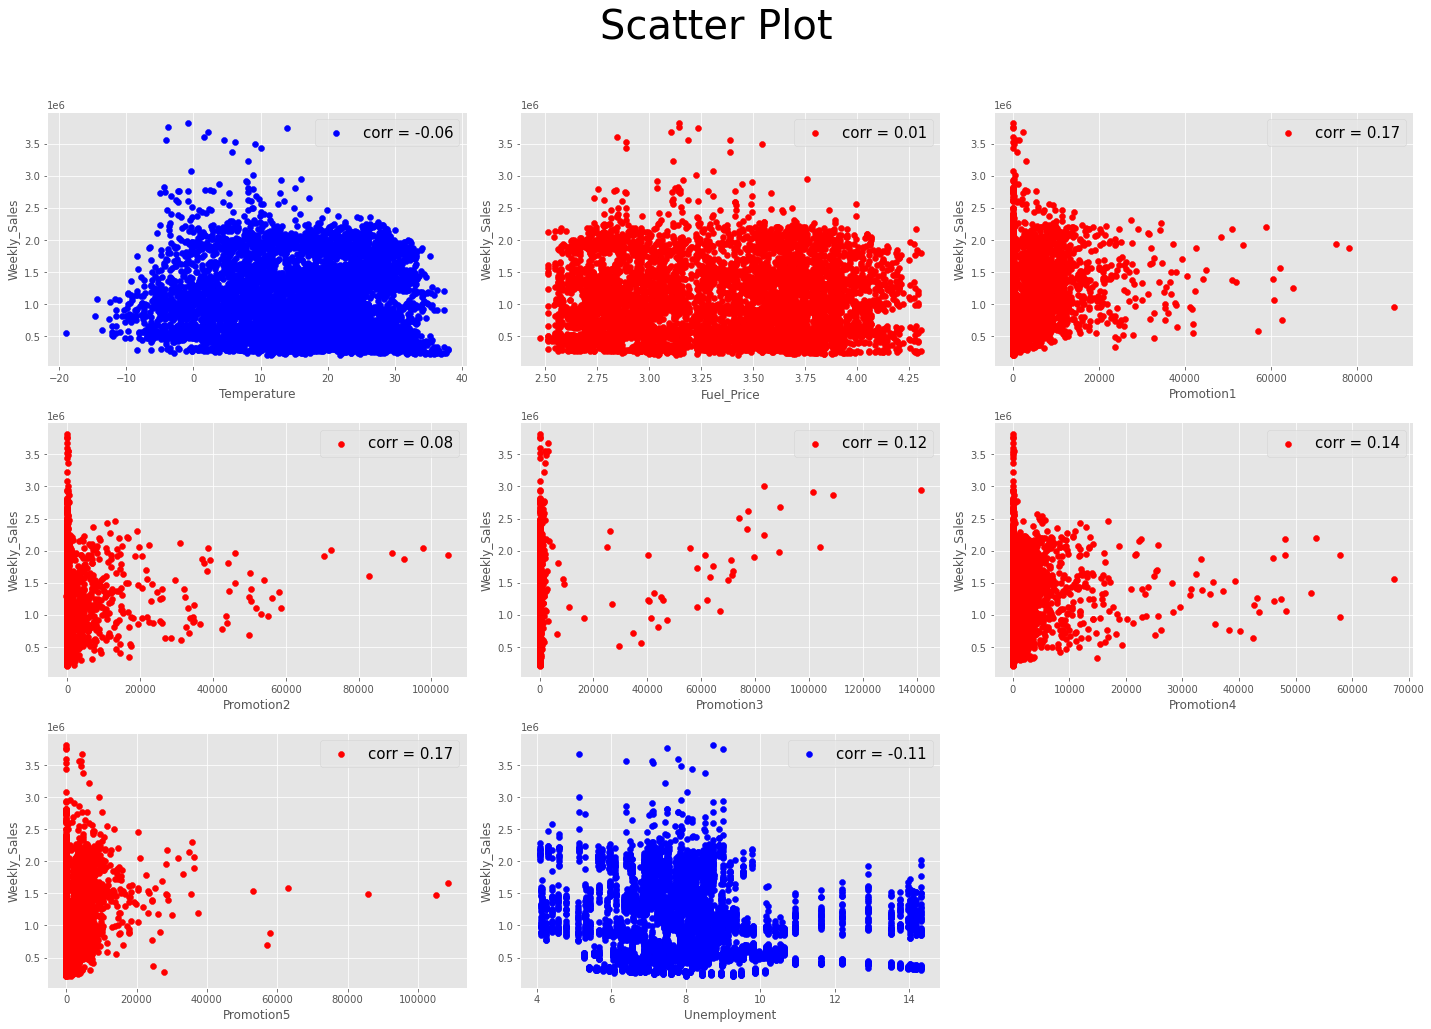

In [62]:
# target
target = 'Weekly_Sales'

feature = numeric_feature.drop(['id', 'Store'])

plt.figure(figsize=(20,15))
plt.suptitle("Scatter Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(feature[:-1])):
    plt.subplot(3,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = train[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(train[feature[i]], train[target], color=c, label=f"corr = {corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Promotion3의 경우 0에 몰려있는 값들을 제외한다면 더 명확한 관계를 확인할 수 있습니다.
